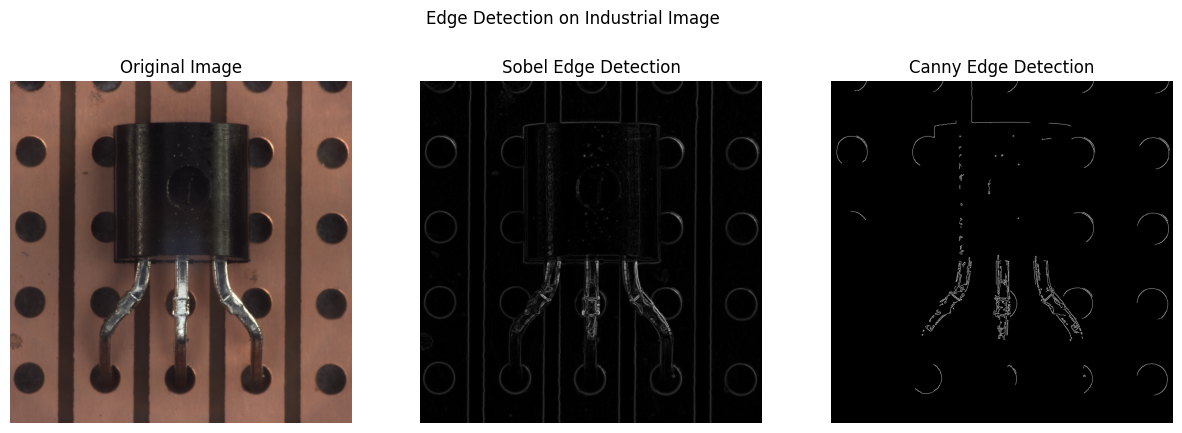

In [2]:
#Hands-on
#1.Implement Sobel and Canny edge detectors on sample industrial images
import cv2
import numpy as np
import matplotlib.pyplot as plt

def apply_sobel(image):
 
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=5)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=5)

    magnitude = cv2.magnitude(sobelx, sobely)

    scale_factor = np.max(magnitude) / 255
    magnitude = (magnitude / scale_factor).astype(np.uint8)
    
    return magnitude

def apply_canny(image, low_threshold=100, high_threshold=200):

    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    edges = cv2.Canny(gray, low_threshold, high_threshold)
    
    return edges

def plot_edges(original, sobel_edges, canny_edges, title):

    plt.figure(figsize=(15, 5))
    
    plt.subplot(1, 3, 1)
    plt.imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.axis('off')
    
    plt.subplot(1, 3, 2)
    plt.imshow(sobel_edges, cmap='gray')
    plt.title('Sobel Edge Detection')
    plt.axis('off')
    
    plt.subplot(1, 3, 3)
    plt.imshow(canny_edges, cmap='gray')
    plt.title('Canny Edge Detection')
    plt.axis('off')
    
    plt.suptitle(title)
    plt.show()

image_path = 'D:/HCL-IP/Hands-on/Sobel And Canny/image1.png' 
image = cv2.imread(image_path)

if image is not None:

    sobel_edges = apply_sobel(image)
    canny_edges = apply_canny(image)

    plot_edges(image, sobel_edges, canny_edges, 'Edge Detection on Industrial Image')
else:
    print(f"Error: Unable to load image at {image_path}")


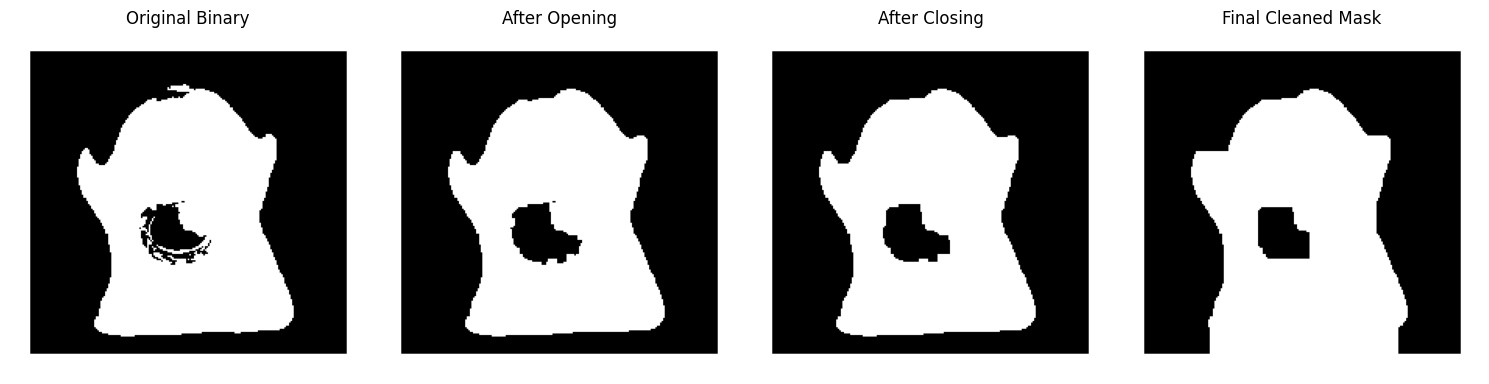

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread("D:/HCL-IP/Hands-on/Morphological/image.png", 0)  # grayscale

# Threshold to create binary mask
_, binary = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

# Define kernels
kernel_small = np.ones((5,5), np.uint8)   # for small noise removal
kernel_large = np.ones((9,9), np.uint8)   # for hole filling

# Step 1: Opening (remove small noise)
opening = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel_small)

# Step 2: Closing (fill small holes)
closing = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, kernel_small)

# Step 3: Stronger Closing with bigger kernel (fill larger holes)
cleaned = cv2.morphologyEx(closing, cv2.MORPH_CLOSE, kernel_large, iterations=2)

# Display results
titles = ["Original Binary", "After Opening", "After Closing", "Final Cleaned Mask"]
images = [binary, opening, closing, cleaned]

plt.figure(figsize=(15,6))
for i in range(4):
    plt.subplot(1,4,i+1)
    plt.imshow(images[i], cmap="gray")
    plt.title(titles[i])
    plt.axis("off")

plt.tight_layout()
plt.show()


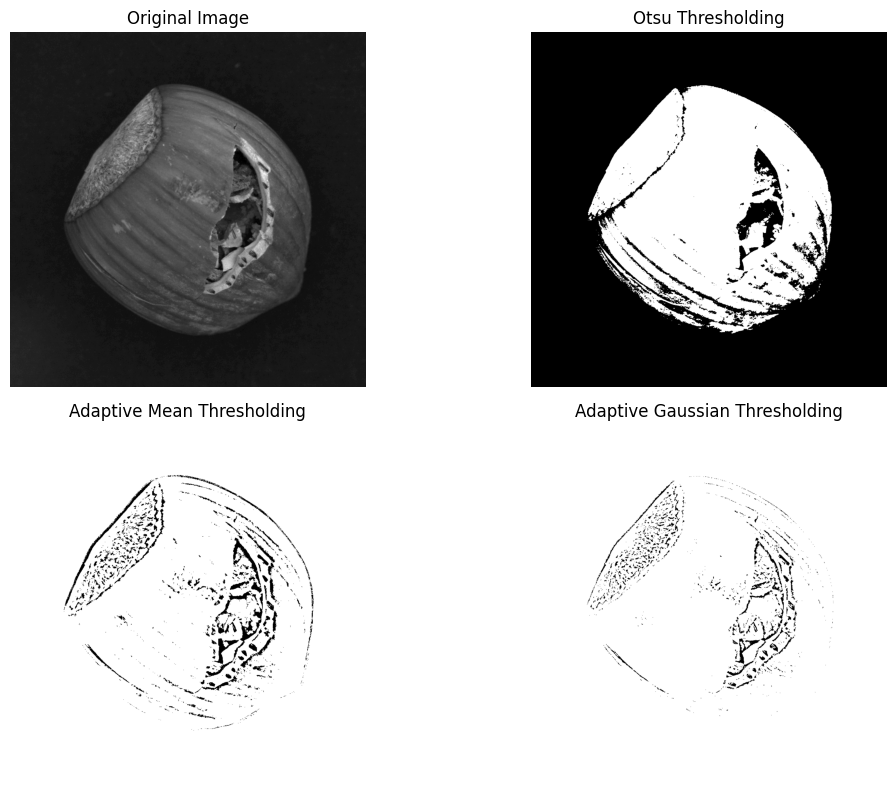

In [3]:
#3.Perform defect segmentation using Otsu and adaptive thresholding
import cv2
import numpy as np
import matplotlib.pyplot as plt


image_path = "D:/HCL-IP/Hands-on/Defect Seg Otsu/hazelnut.png"   
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

_, otsu_thresh = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

adaptive_mean = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C,
                                      cv2.THRESH_BINARY, blockSize=25, C=10)

adaptive_gauss = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                       cv2.THRESH_BINARY, blockSize=25, C=10)


plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.title("Original Image")
plt.imshow(img, cmap='gray')
plt.axis("off")

plt.subplot(2, 2, 2)
plt.title("Otsu Thresholding")
plt.imshow(otsu_thresh, cmap='gray')
plt.axis("off")

plt.subplot(2, 2, 3)
plt.title("Adaptive Mean Thresholding")
plt.imshow(adaptive_mean, cmap='gray')
plt.axis("off")

plt.subplot(2, 2, 4)
plt.title("Adaptive Gaussian Thresholding")
plt.imshow(adaptive_gauss, cmap='gray')
plt.axis("off")

plt.tight_layout()
plt.show()


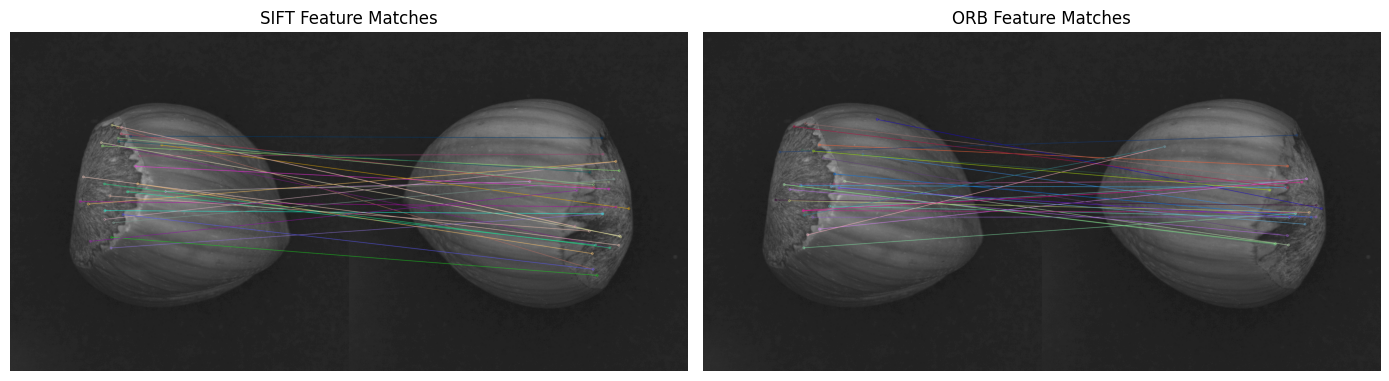

In [5]:
#4.Extract SIFT/ORB features for part identification or alignment tasks
import cv2
import matplotlib.pyplot as plt

img1 = cv2.imread("D:/HCL-IP/Hands-on/PartOrAlign-SIFT_ORB/ref.png", cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread("D:/HCL-IP/Hands-on/PartOrAlign-SIFT_ORB/test.png", cv2.IMREAD_GRAYSCALE)

sift = cv2.SIFT_create()

kp1_sift, des1_sift = sift.detectAndCompute(img1, None)
kp2_sift, des2_sift = sift.detectAndCompute(img2, None)

bf_sift = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)
matches_sift = bf_sift.match(des1_sift, des2_sift)
matches_sift = sorted(matches_sift, key=lambda x: x.distance)

sift_result = cv2.drawMatches(img1, kp1_sift, img2, kp2_sift, matches_sift[:30], None,
                              flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

orb = cv2.ORB_create(nfeatures=1000)

kp1_orb, des1_orb = orb.detectAndCompute(img1, None)
kp2_orb, des2_orb = orb.detectAndCompute(img2, None)

bf_orb = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches_orb = bf_orb.match(des1_orb, des2_orb)
matches_orb = sorted(matches_orb, key=lambda x: x.distance)

orb_result = cv2.drawMatches(img1, kp1_orb, img2, kp2_orb, matches_orb[:30], None,
                             flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

plt.figure(figsize=(14, 8))

plt.subplot(1, 2, 1)
plt.title("SIFT Feature Matches")
plt.imshow(sift_result)
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title("ORB Feature Matches")
plt.imshow(orb_result)
plt.axis("off")

plt.tight_layout()
plt.show()


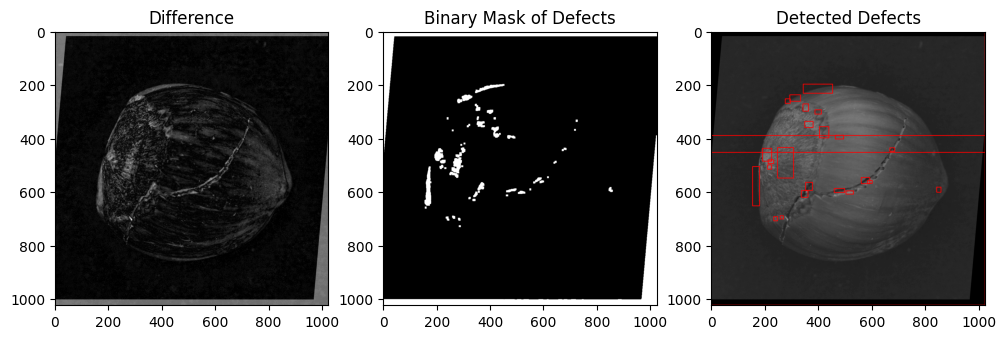

In [ ]:
#5.Design of Classical CV Pipelines for Defect Localization and Pattern Matching
#Localization
import cv2
import numpy as np
import matplotlib.pyplot as plt

ref = cv2.imread("D:/HCL-IP/Hands-on/Defect Local/Localization/img_reference.png", cv2.IMREAD_GRAYSCALE)
test = cv2.imread("D:/HCL-IP/Hands-on/Defect Local/Localization/img_test.png", cv2.IMREAD_GRAYSCALE)

if ref.shape != test.shape:
    test = cv2.resize(test, (ref.shape[1], ref.shape[0]))

def align_images(template, test, warp_mode=cv2.MOTION_AFFINE, iterations=5000, eps=1e-6):
   
    im1 = template.astype(np.float32)
    im2 = test.astype(np.float32)

    if warp_mode == cv2.MOTION_HOMOGRAPHY:
        warp_matrix = np.eye(3, 3, dtype=np.float32)
    else:
        warp_matrix = np.eye(2, 3, dtype=np.float32)

    criteria = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, iterations, eps)

    cc, warp_matrix = cv2.findTransformECC(im1, im2, warp_matrix, warp_mode, criteria)

    if warp_mode == cv2.MOTION_HOMOGRAPHY:
        aligned = cv2.warpPerspective(test, warp_matrix, (template.shape[1], template.shape[0]),
                                      flags=cv2.INTER_LINEAR + cv2.WARP_INVERSE_MAP)
    else:
        aligned = cv2.warpAffine(test, warp_matrix, (template.shape[1], template.shape[0]),
                                 flags=cv2.INTER_LINEAR + cv2.WARP_INVERSE_MAP)
    return aligned

aligned_test = align_images(ref, test, warp_mode=cv2.MOTION_AFFINE)

diff = cv2.absdiff(ref, aligned_test)

blur = cv2.GaussianBlur(diff, (5,5), 0)
_, thresh = cv2.threshold(blur, 25, 255, cv2.THRESH_BINARY)

kernel = np.ones((3,3), np.uint8)
opened = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)

dilated = cv2.dilate(opened, kernel, iterations=1)

contours, _ = cv2.findContours(dilated, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
annotated = cv2.cvtColor(aligned_test, cv2.COLOR_GRAY2BGR)

for c in contours:
    x,y,w,h = cv2.boundingRect(c)
    if cv2.contourArea(c) > 100:    
        cv2.rectangle(annotated, (x,y), (x+w,y+h), (0,0,255), 2)

plt.figure(figsize=(12,6))
plt.subplot(1,3,1)
plt.imshow(diff, cmap='gray')
plt.title("Difference")

plt.subplot(1,3,2)
plt.imshow(dilated, cmap='gray')
plt.title("Binary Mask of Defects")

plt.subplot(1,3,3)
plt.imshow(annotated[:,:,::-1])
plt.title("Detected Defects")

plt.show()

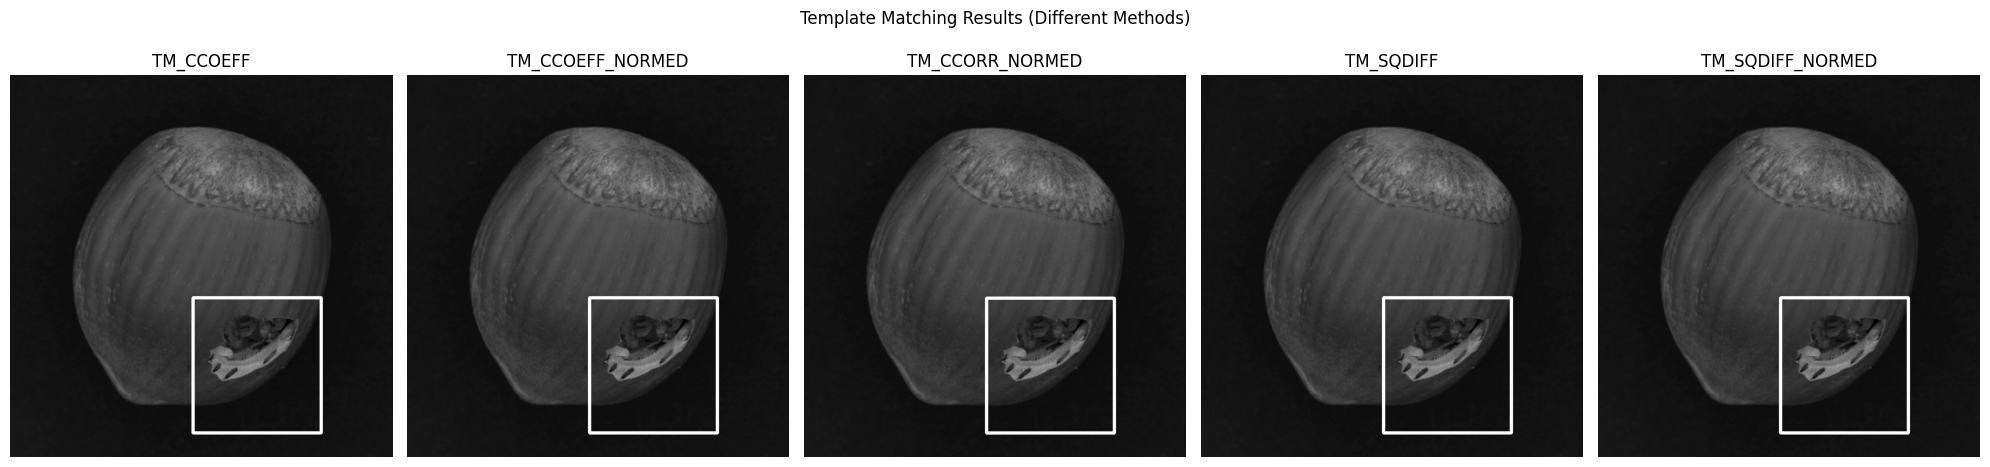

In [3]:
#Template Matching (with subplot visualization)
import numpy as np
import cv2
import matplotlib.pyplot as plt

img = cv2.resize(cv2.imread('D:/HCL-IP/Hands-on/Defect Local/Template/image.png', 0), (0, 0), fx=0.8, fy=0.8)
template = cv2.resize(cv2.imread('D:/HCL-IP/Hands-on/Defect Local/Template/pattern.png', 0), (0, 0), fx=0.8, fy=0.8)
h, w = template.shape

methods = [cv2.TM_CCOEFF, cv2.TM_CCOEFF_NORMED,
            cv2.TM_CCORR_NORMED, cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]

method_names = ['TM_CCOEFF', 'TM_CCOEFF_NORMED', 'TM_CCORR_NORMED', 'TM_SQDIFF', 'TM_SQDIFF_NORMED']
fig, axes = plt.subplots(1, len(methods), figsize=(20, 5))

for idx, method in enumerate(methods):
    img2 = img.copy()
    result = cv2.matchTemplate(img2, template, method)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        location = min_loc
    else:
        location = max_loc
    bottom_right = (location[0] + w, location[1] + h)
    cv2.rectangle(img2, location, bottom_right, 255, 5)
    axes[idx].imshow(img2, cmap='gray')
    axes[idx].set_title(method_names[idx])
    axes[idx].axis('off')

plt.suptitle('Template Matching Results (Different Methods)')
plt.tight_layout()
plt.show()

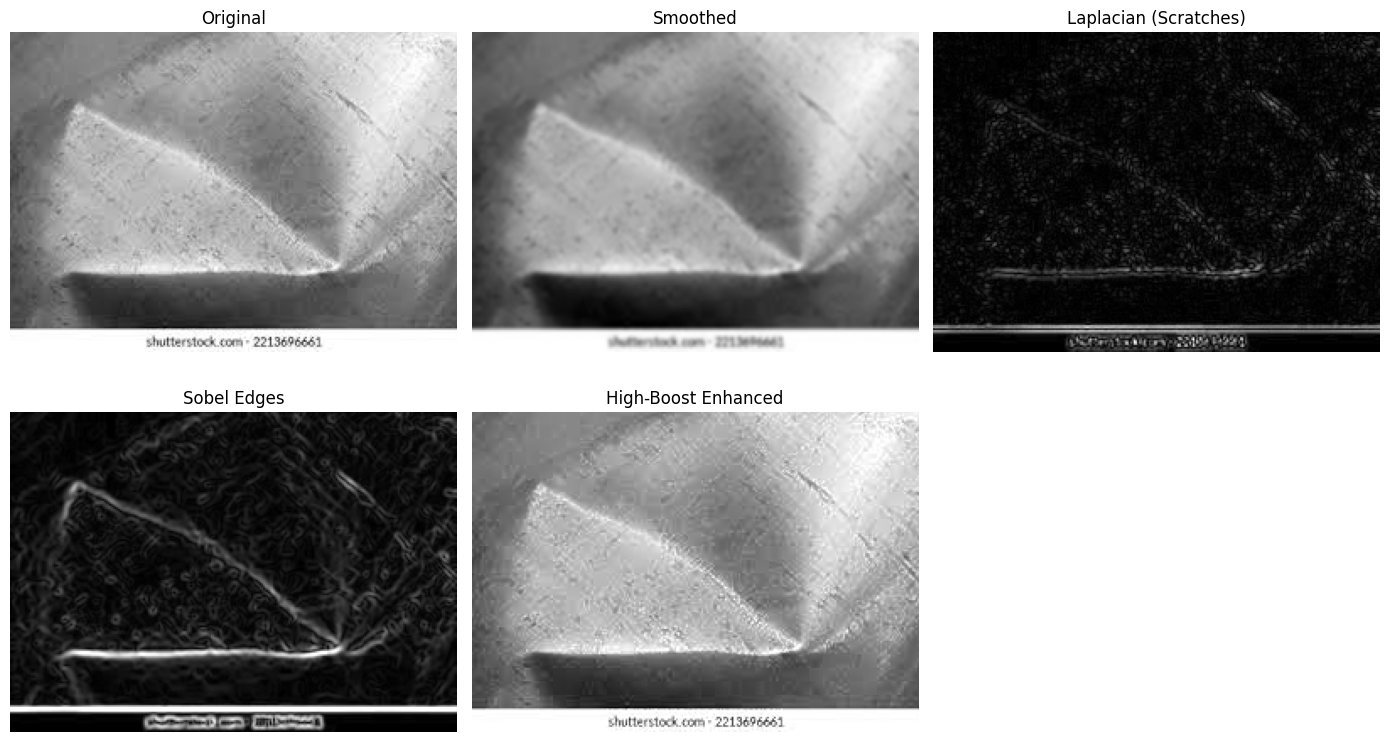

In [4]:
#Assignments
#1.Apply spatial filtering to enhance the surface of an automotive part image and highlight scratches or dents. 
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread("D:/HCL-IP/Assignment-1/spatial filtering/images.jpeg", cv2.IMREAD_GRAYSCALE)

blur = cv2.GaussianBlur(img, (5,5), 0)

laplacian = cv2.Laplacian(blur, cv2.CV_64F, ksize=3)
laplacian = cv2.convertScaleAbs(laplacian)

sobelx = cv2.Sobel(blur, cv2.CV_64F, 1, 0, ksize=3)
sobely = cv2.Sobel(blur, cv2.CV_64F, 0, 1, ksize=3)
sobel = cv2.magnitude(sobelx, sobely)
sobel = cv2.convertScaleAbs(sobel)

mask = cv2.subtract(img, blur)
high_boost = cv2.add(img, mask)  

plt.figure(figsize=(14,8))

plt.subplot(2,3,1), plt.imshow(img, cmap='gray'), plt.title("Original"), plt.axis("off")
plt.subplot(2,3,2), plt.imshow(blur, cmap='gray'), plt.title("Smoothed"), plt.axis("off")
plt.subplot(2,3,3), plt.imshow(laplacian, cmap='gray'), plt.title("Laplacian (Scratches)"), plt.axis("off")
plt.subplot(2,3,4), plt.imshow(sobel, cmap='gray'), plt.title("Sobel Edges"), plt.axis("off")
plt.subplot(2,3,5), plt.imshow(high_boost, cmap='gray'), plt.title("High-Boost Enhanced"), plt.axis("off")

plt.tight_layout()
plt.show()


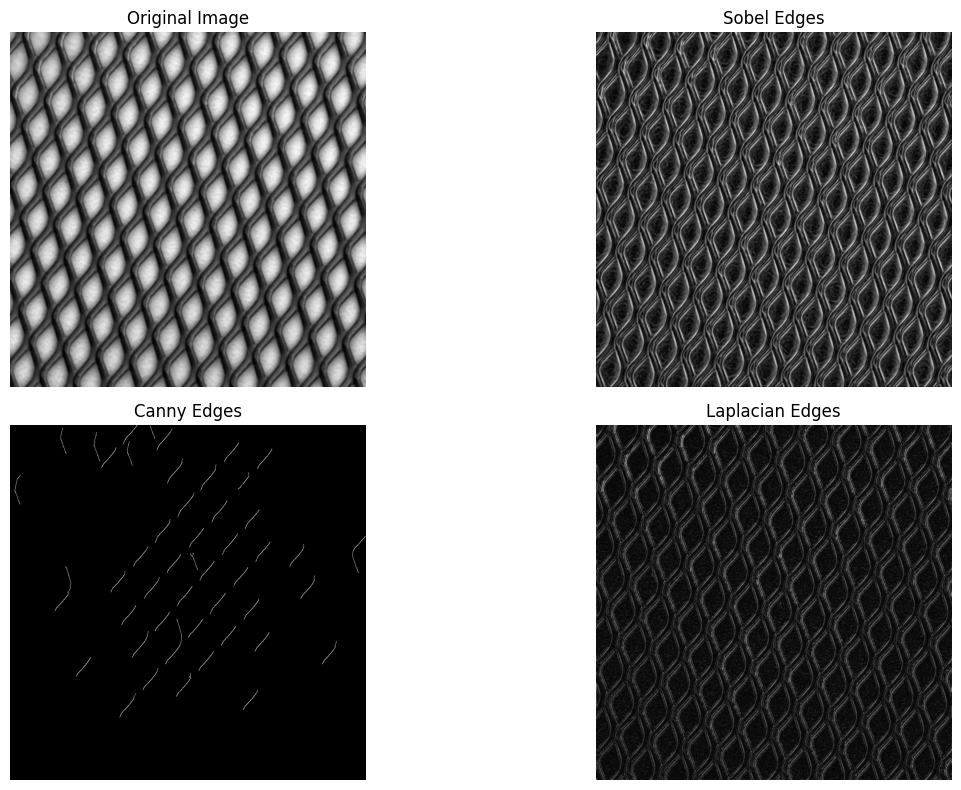

In [5]:
#2.Implement Sobel, Canny, and Laplacian edge detectors on bridge/concrete images to detect cracks. Compare their effectiveness
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread("D:/HCL-IP/Assignment-1/Sobel, Canny, and Laplacian/000.png", cv2.IMREAD_GRAYSCALE)

blurred = cv2.GaussianBlur(img, (5, 5), 0)

sobelx = cv2.Sobel(blurred, cv2.CV_64F, 1, 0, ksize=3)
sobely = cv2.Sobel(blurred, cv2.CV_64F, 0, 1, ksize=3)
sobel = cv2.magnitude(sobelx, sobely)
sobel = cv2.convertScaleAbs(sobel)

canny = cv2.Canny(blurred, 80, 180) 

laplacian = cv2.Laplacian(blurred, cv2.CV_64F, ksize=3)
laplacian = cv2.convertScaleAbs(laplacian)

plt.figure(figsize=(14,8))

plt.subplot(2,2,1)
plt.title("Original Image")
plt.imshow(img, cmap='gray')
plt.axis("off")

plt.subplot(2,2,2)
plt.title("Sobel Edges")
plt.imshow(sobel, cmap='gray')
plt.axis("off")

plt.subplot(2,2,3)
plt.title("Canny Edges")
plt.imshow(canny, cmap='gray')
plt.axis("off")

plt.subplot(2,2,4)
plt.title("Laplacian Edges")
plt.imshow(laplacian, cmap='gray')
plt.axis("off")

plt.tight_layout()
plt.show()


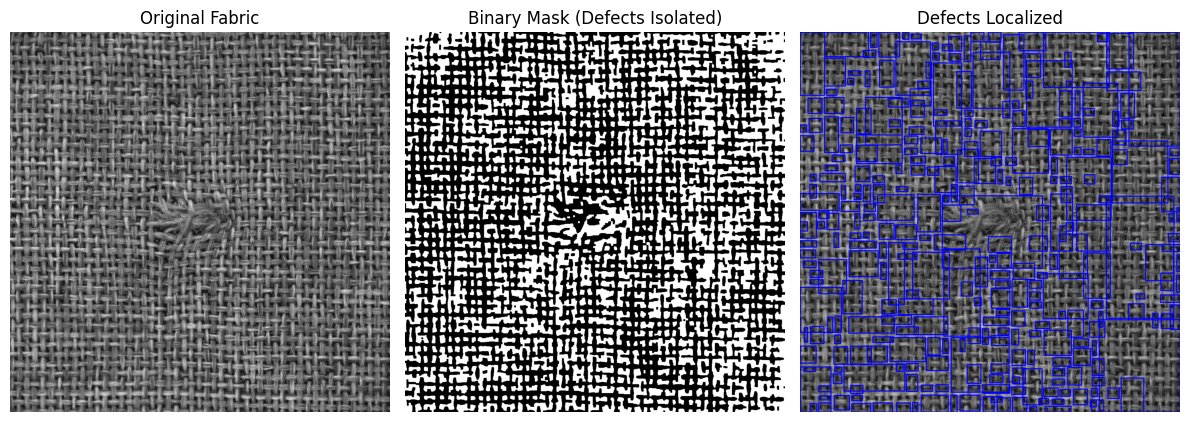

In [1]:
#3.Use morphological operations (opening/closing) to isolate defective regions in a fabric image
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread("D:/HCL-IP/Assignment-1/morphological operations/003.png", cv2.IMREAD_GRAYSCALE)

blur = cv2.GaussianBlur(img, (5,5), 0)

_, thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5,5))

opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)   
closing = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, kernel) 

contours, _ = cv2.findContours(closing, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
result = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)

for c in contours:
    if cv2.contourArea(c) > 200:
        x,y,w,h = cv2.boundingRect(c)
        cv2.rectangle(result, (x,y), (x+w,y+h), (0,0,255), 2)

plt.figure(figsize=(12,6))

plt.subplot(1,3,1), plt.imshow(img, cmap='gray'), plt.title("Original Fabric"), plt.axis("off")
plt.subplot(1,3,2), plt.imshow(closing, cmap='gray'), plt.title("Binary Mask (Defects Isolated)"), plt.axis("off")
plt.subplot(1,3,3), plt.imshow(result), plt.title("Defects Localized"), plt.axis("off")

plt.tight_layout()
plt.show()


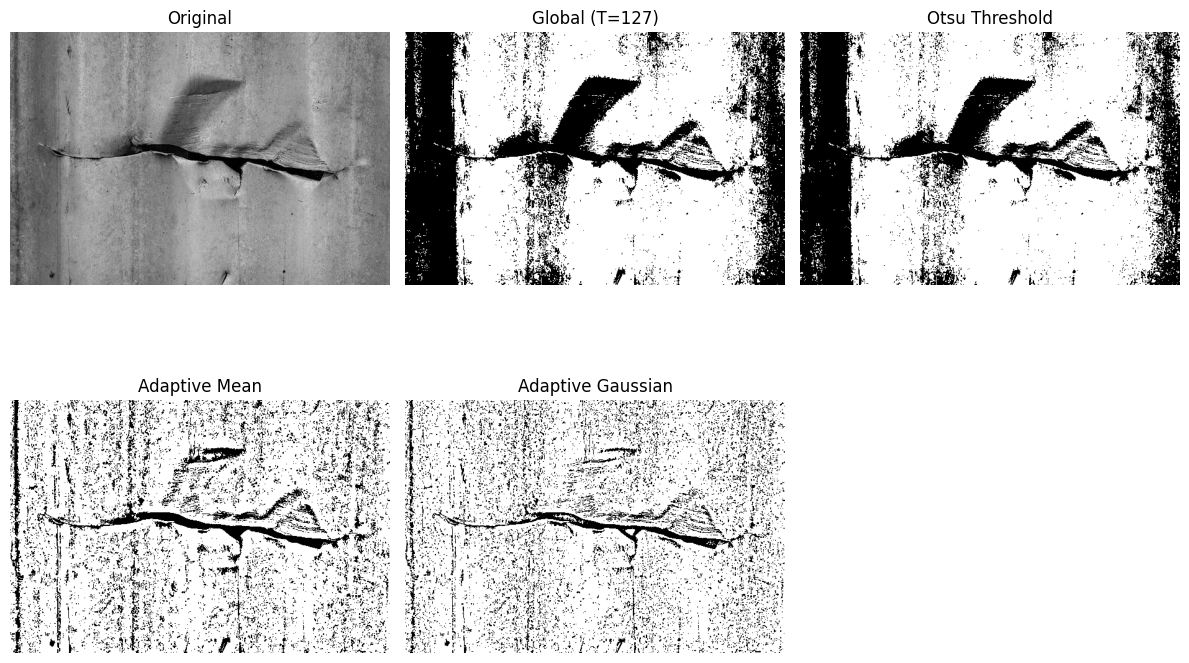

In [3]:
#4.Apply global, adaptive, and Otsu thresholding on metal surface images to separate defective vs. non-defective regions. 
# Provide comparative results
import cv2
import matplotlib.pyplot as plt

img = cv2.imread("D:/HCL-IP/Assignment-1/global, adaptive, and Otsu/img.jpg", cv2.IMREAD_GRAYSCALE)

_, global_thresh = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)


_, otsu_thresh = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)


adaptive_mean = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C,
                                      cv2.THRESH_BINARY, blockSize=25, C=10)

adaptive_gauss = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                       cv2.THRESH_BINARY, blockSize=25, C=10)


plt.figure(figsize=(12,8))

plt.subplot(2,3,1), plt.imshow(img, cmap='gray'), plt.title("Original"), plt.axis("off")
plt.subplot(2,3,2), plt.imshow(global_thresh, cmap='gray'), plt.title("Global (T=127)"), plt.axis("off")
plt.subplot(2,3,3), plt.imshow(otsu_thresh, cmap='gray'), plt.title("Otsu Threshold"), plt.axis("off")
plt.subplot(2,3,4), plt.imshow(adaptive_mean, cmap='gray'), plt.title("Adaptive Mean"), plt.axis("off")
plt.subplot(2,3,5), plt.imshow(adaptive_gauss, cmap='gray'), plt.title("Adaptive Gaussian"), plt.axis("off")

plt.tight_layout()
plt.show()



tomato in D:\HCL-IP\Assignment-1\Color_based_thresh\tomatoes\tomato_1.jpg is ripe
tomato in D:\HCL-IP\Assignment-1\Color_based_thresh\tomatoes\tomato_2.jpg is unripe
tomato in D:\HCL-IP\Assignment-1\Color_based_thresh\tomatoes\tomato_3.jpg is ripe


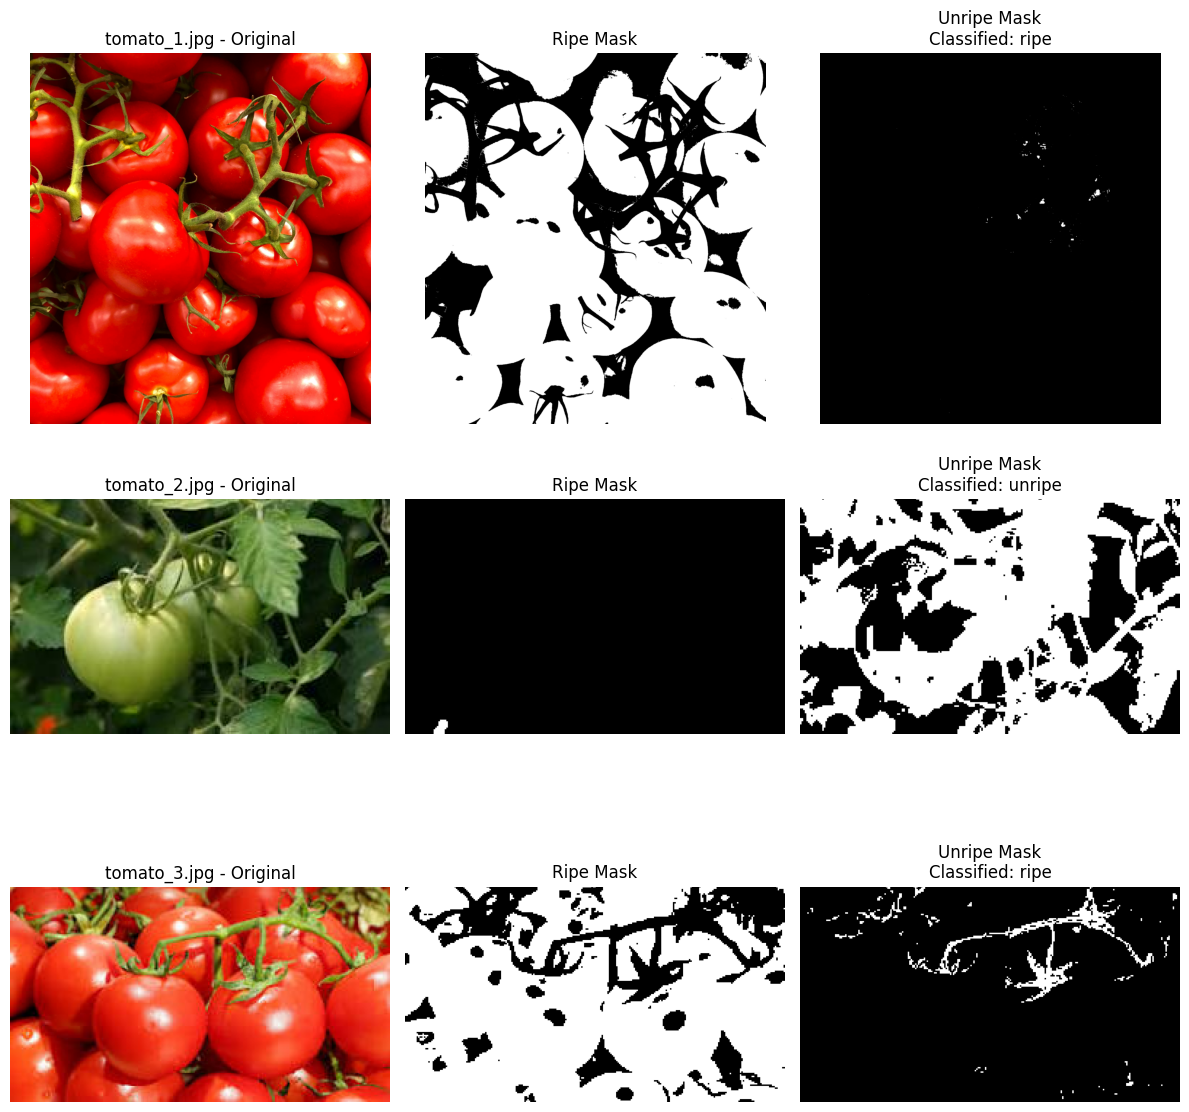

In [1]:
#5.Develop a color-based thresholding method (HSV space) to classify fruits as ripe or unripe. Test on at least 5 samples.
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

hsv_ranges = {
    'banana': {
        'ripe': ((20, 100, 100), (35, 255, 255)),    
        'unripe': ((35, 50, 50), (85, 255, 255))    
    },
    'tomato': {
        'ripe': ((0, 100, 100), (10, 255, 255)),     
        'ripe2': ((160, 100, 100), (180, 255, 255)), 
        'unripe': ((35, 50, 50), (85, 255, 255))    
    }
}

def classify_fruit(image_path, fruit_name):
    img = cv2.imread(image_path)
    if img is None:
        print(f"Error: Could not read {image_path}. Check path!")
        return None

    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

    if fruit_name == 'tomato': 
        ripe_mask1 = cv2.inRange(hsv, np.array(hsv_ranges['tomato']['ripe'][0]), np.array(hsv_ranges['tomato']['ripe'][1]))
        ripe_mask2 = cv2.inRange(hsv, np.array(hsv_ranges['tomato']['ripe2'][0]), np.array(hsv_ranges['tomato']['ripe2'][1]))
        ripe_mask = cv2.bitwise_or(ripe_mask1, ripe_mask2)
    else:
        ripe_lower, ripe_upper = hsv_ranges[fruit_name]['ripe']
        ripe_mask = cv2.inRange(hsv, np.array(ripe_lower), np.array(ripe_upper))

    unripe_lower, unripe_upper = hsv_ranges[fruit_name]['unripe']
    unripe_mask = cv2.inRange(hsv, np.array(unripe_lower), np.array(unripe_upper))

    ripe_pixels = cv2.countNonZero(ripe_mask)
    unripe_pixels = cv2.countNonZero(unripe_mask)

    classification = 'ripe' if ripe_pixels > unripe_pixels else 'unripe'

    print(f"{fruit_name} in {image_path} is {classification}")

    return img, ripe_mask, unripe_mask, classification

def classify_folder(folder_path, fruit_name):
    files = [f for f in os.listdir(folder_path) if f.lower().endswith(('.jpg', '.png', '.jpeg'))]
    if not files:
        print("No images found in the folder!")
        return

    n = len(files)
    plt.figure(figsize=(12, 4 * n))
    for idx, file in enumerate(files):
        image_path = os.path.join(folder_path, file)
        img, ripe_mask, unripe_mask, classification = classify_fruit(image_path, fruit_name)
        plt.subplot(n, 3, idx * 3 + 1)
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.title(f'{file} - Original')
        plt.axis('off')
        plt.subplot(n, 3, idx * 3 + 2)
        plt.imshow(ripe_mask, cmap='gray')
        plt.title('Ripe Mask')
        plt.axis('off')
        plt.subplot(n, 3, idx * 3 + 3)
        plt.imshow(unripe_mask, cmap='gray')
        plt.title(f'Unripe Mask\nClassified: {classification}')
        plt.axis('off')
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":

    banana_folder = r"D:\HCL-IP\Assignment-1\Color_based_thresh\bananas"
    tomato_folder = r"D:\HCL-IP\Assignment-1\Color_based_thresh\tomatoes"

    classify_folder(tomato_folder, 'tomato')

Good: 9, Broken: 0, Missing: 1


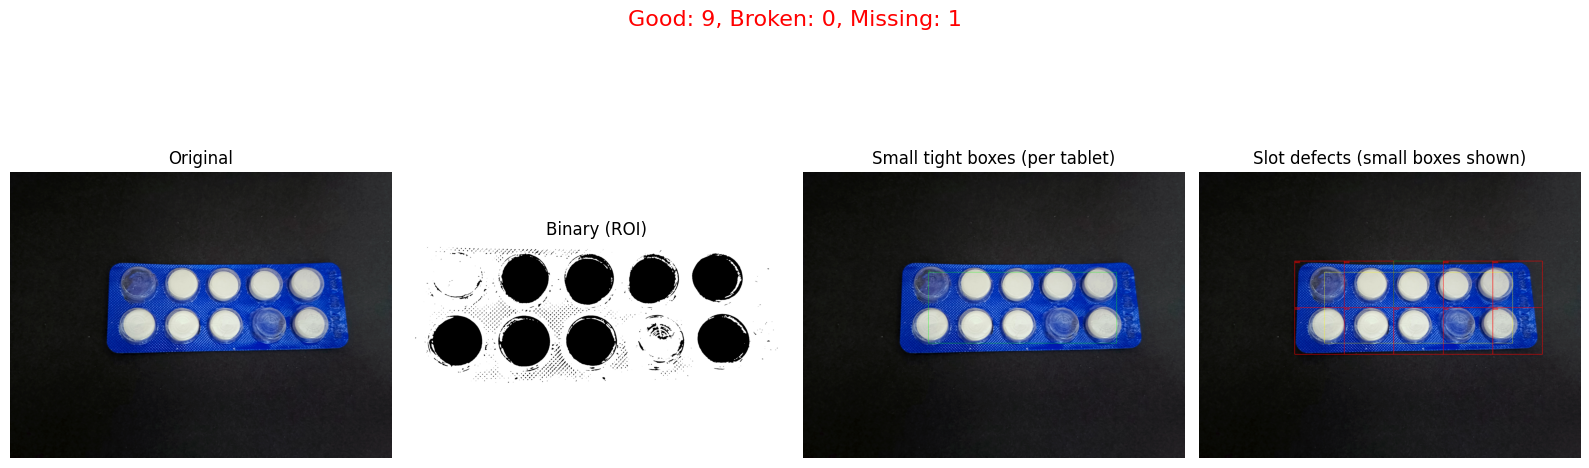

In [8]:
#6.Use connected components analysis on a tablet image to detect missing, broken, or extra objects. 
# Display bounding boxes for identified defects.

import cv2
import numpy as np
import matplotlib.pyplot as plt

# ---------- SETTINGS ----------
IMG_PATH = "D:/HCL-IP/Assignment-1/CCA/tablets.jpg" # <- change to your image path
ROWS = 2
COLS = 5
MIN_AREA = 200        # filter tiny noise (increase if many specks)
SHRINK_FACTOR = 0.12  # fraction to shrink bounding box edges for "small" tight box
BLISTER_PAD = 8       # pad when cropping blister bbox

# ---------- LOAD ----------
img = cv2.imread(IMG_PATH)
if img is None:
    raise FileNotFoundError(f"Image not found: {IMG_PATH}")
H, W = img.shape[:2]

# ---------- 1) Try to localize blister by blue color (fallback to whole image) ----------
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
lower_blue = np.array([85, 40, 40])
upper_blue = np.array([140, 255, 255])
blue_mask = cv2.inRange(hsv, lower_blue, upper_blue)
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (9,9))
blue_mask = cv2.morphologyEx(blue_mask, cv2.MORPH_CLOSE, kernel)
blue_mask = cv2.morphologyEx(blue_mask, cv2.MORPH_OPEN, kernel)

cnts, _ = cv2.findContours(blue_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
if cnts:
    c = max(cnts, key=cv2.contourArea)
    bx, by, bw, bh = cv2.boundingRect(c)
    rx0 = max(0, bx - BLISTER_PAD); ry0 = max(0, by - BLISTER_PAD)
    rx1 = min(W, bx + bw + BLISTER_PAD); ry1 = min(H, by + bh + BLISTER_PAD)
else:
    # fallback: use whole image
    rx0, ry0, rx1, ry1 = 0, 0, W, H

roi = img[ry0:ry1, rx0:rx1]

# ---------- 2) Preprocess ROI and produce binary mask ----------
gray = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray, (5,5), 0)
_, th = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
th = cv2.morphologyEx(th, cv2.MORPH_OPEN, np.ones((3,3), np.uint8))

# ---------- 3) Find connected components / contours (tablet pieces) ----------
contours, _ = cv2.findContours(th, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
components = []
for cnt in contours:
    area = cv2.contourArea(cnt)
    if area < MIN_AREA:
        continue
    x, y, w, h = cv2.boundingRect(cnt)
    # convert ROI-local bbox to image-global coords
    gx, gy = rx0 + x, ry0 + y
    # centroid (global)
    M = cv2.moments(cnt)
    if M["m00"] != 0:
        cx = rx0 + int(M["m10"] / M["m00"])
        cy = ry0 + int(M["m01"] / M["m00"])
    else:
        cx = gx + w//2; cy = gy + h//2
    components.append({
        "bbox": (int(gx), int(gy), int(w), int(h)),
        "centroid": (int(cx), int(cy)),
        "area": float(area)
    })

# ---------- 4) Make small tight boxes around each component ----------
img_small_boxes = img.copy()
for idx, comp in enumerate(sorted(components, key=lambda c: (c["centroid"][1], c["centroid"][0])), start=1):
    x, y, w, h = comp["bbox"]
    # shrink margins for "small" box
    sx = int(x + w * SHRINK_FACTOR)
    sy = int(y + h * SHRINK_FACTOR)
    ex = int(x + w - w * SHRINK_FACTOR)
    ey = int(y + h - h * SHRINK_FACTOR)
    # ensure valid
    sx, sy = max(0, sx), max(0, sy)
    ex, ey = min(W-1, ex), min(H-1, ey)
    cv2.rectangle(img_small_boxes, (sx, sy), (ex, ey), (0, 255, 0), 2)
    cv2.putText(img_small_boxes, str(idx), (sx, sy-6),
                cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0,255,0), 2)

# ---------- 5) Create slot grid & assign components by centroid ----------
slot_w = (rx1 - rx0) / COLS
slot_h = (ry1 - ry0) / ROWS
slots = []
for r in range(ROWS):
    for c in range(COLS):
        sx0 = int(rx0 + c * slot_w)
        sy0 = int(ry0 + r * slot_h)
        sx1 = int(sx0 + slot_w)
        sy1 = int(sy0 + slot_h)
        slots.append({"row": r, "col": c, "rect": (sx0, sy0, sx1, sy1), "comps": []})

# assign components to slots by centroid (if slightly outside, assign to nearest)
for comp in components:
    cx, cy = comp["centroid"]
    assigned = False
    for s in slots:
        x0,y0,x1,y1 = s["rect"]
        if x0 <= cx <= x1 and y0 <= cy <= y1:
            s["comps"].append(comp)
            assigned = True
            break
    if not assigned:
        # fallback: nearest slot center
        centers = [(((sl["rect"][0] + sl["rect"][2]) / 2.0),
                    ((sl["rect"][1] + sl["rect"][3]) / 2.0)) for sl in slots]
        dists = [np.hypot(cx - cx2, cy - cy2) for cx2, cy2 in centers]
        idx = int(np.argmin(dists))
        slots[idx]["comps"].append(comp)

# ---------- 6) Classify slots and draw defects (but keep small boxes inside) ----------
img_defects = img.copy()
missing = broken = good = 0
for s in slots:
    sx0, sy0, sx1, sy1 = s["rect"]
    cnt = len(s["comps"])
    if cnt == 0:
        good += 1
        cv2.rectangle(img_defects, (sx0, sy0), (sx1, sy1), (0, 0, 255), 3)   # slot red
        cv2.putText(img_defects, "GOOD", (sx0 + 4, sy0 + 20),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0,0,255), 2)
    elif cnt == 1:
        missing += 1
        # draw a thin green slot rectangle
        cv2.rectangle(img_defects, (sx0, sy0), (sx1, sy1), (0, 200, 0), 2)
    else:
        broken += 1
        cv2.rectangle(img_defects, (sx0, sy0), (sx1, sy1), (255, 0, 0), 3)
        cv2.putText(img_defects, f"Broken({cnt})", (sx0 + 4, sy0 + 20),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,0,0), 2)
# also draw the small boxes inside defects image for clarity
for comp in components:
    x,y,w,h = comp["bbox"]
    sx = int(x + w * SHRINK_FACTOR)
    sy = int(y + h * SHRINK_FACTOR)
    ex = int(x + w - w * SHRINK_FACTOR)
    ey = int(y + h - h * SHRINK_FACTOR)
    cv2.rectangle(img_defects, (sx, sy), (ex, ey), (0,255,255), 2)  # yellow small boxes

status = f"Good: {good}, Broken: {broken}, Missing: {missing}"
print(status)

# ---------- 7) PLOT ----------
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
th_rgb = cv2.cvtColor(th, cv2.COLOR_GRAY2RGB)
img_small_rgb = cv2.cvtColor(img_small_boxes, cv2.COLOR_BGR2RGB)
img_def_rgb = cv2.cvtColor(img_defects, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(16,6))
plt.subplot(1,4,1); plt.title("Original"); plt.imshow(img_rgb); plt.axis("off")
plt.subplot(1,4,2); plt.title("Binary (ROI)"); plt.imshow(th_rgb); plt.axis("off")
plt.subplot(1,4,3); plt.title("Small tight boxes (per tablet)"); plt.imshow(img_small_rgb); plt.axis("off")
plt.subplot(1,4,4); plt.title("Slot defects (small boxes shown)"); plt.imshow(img_def_rgb); plt.axis("off")
plt.suptitle(status, fontsize=16, color="red")
plt.tight_layout(); plt.show()






===== PCB Inspection Report =====
Total solder joints: 327
Good joints: 36 (11.0%)
Defective joints: 291 (89.0%)


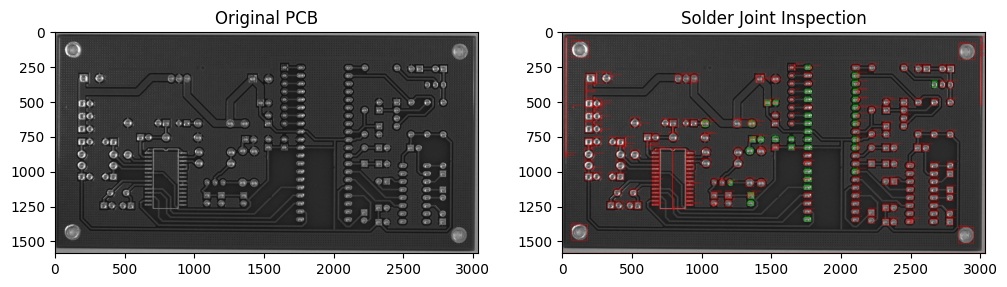

In [5]:
#7.Apply connected component labeling to count defective vs. good solder joints on PCB images. Provide statistics of the results
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread("D:/HCL-IP/Assignment-1/SolderJointsonPCB/pcb.jpg", cv2.IMREAD_GRAYSCALE)

blur = cv2.GaussianBlur(img, (5, 5), 0)

_, thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

if np.sum(thresh == 255) > np.sum(thresh == 0):
    thresh = cv2.bitwise_not(thresh)

kernel = np.ones((3, 3), np.uint8)
mask = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)

n_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(mask, connectivity=8)

output = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)

good_count = 0
defective_count = 0

areas = stats[1:, cv2.CC_STAT_AREA]
normal_area = np.median(areas)

for i in range(1, n_labels): 
    x, y, w, h, area = stats[i]

    comp_mask = (labels == i).astype("uint8") * 255
    contours, _ = cv2.findContours(comp_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    if not contours:
        continue

    perimeter = cv2.arcLength(contours[0], True)
    circularity = 4 * np.pi * area / (perimeter * perimeter + 1e-6)

    if 0.7*normal_area <= area <= 1.5*normal_area and circularity > 0.6:
        label = "Good"
        color = (0, 255, 0)  
        good_count += 1
    else:
        label = "Defective"
        color = (0, 0, 255)   
        defective_count += 1

    # Draw
    cv2.rectangle(output, (x, y), (x + w, y + h), color, 2)
    cv2.putText(output, label, (x, y-5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 1)

total_joints = good_count + defective_count
good_pct = 100.0 * good_count / total_joints if total_joints > 0 else 0
bad_pct = 100.0 * defective_count / total_joints if total_joints > 0 else 0

print("===== PCB Inspection Report =====")
print(f"Total solder joints: {total_joints}")
print(f"Good joints: {good_count} ({good_pct:.1f}%)")
print(f"Defective joints: {defective_count} ({bad_pct:.1f}%)")

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.imshow(img, cmap="gray")
plt.title("Original PCB")

plt.subplot(1,2,2)
plt.imshow(output[:,:,::-1])
plt.title("Solder Joint Inspection")
plt.show()

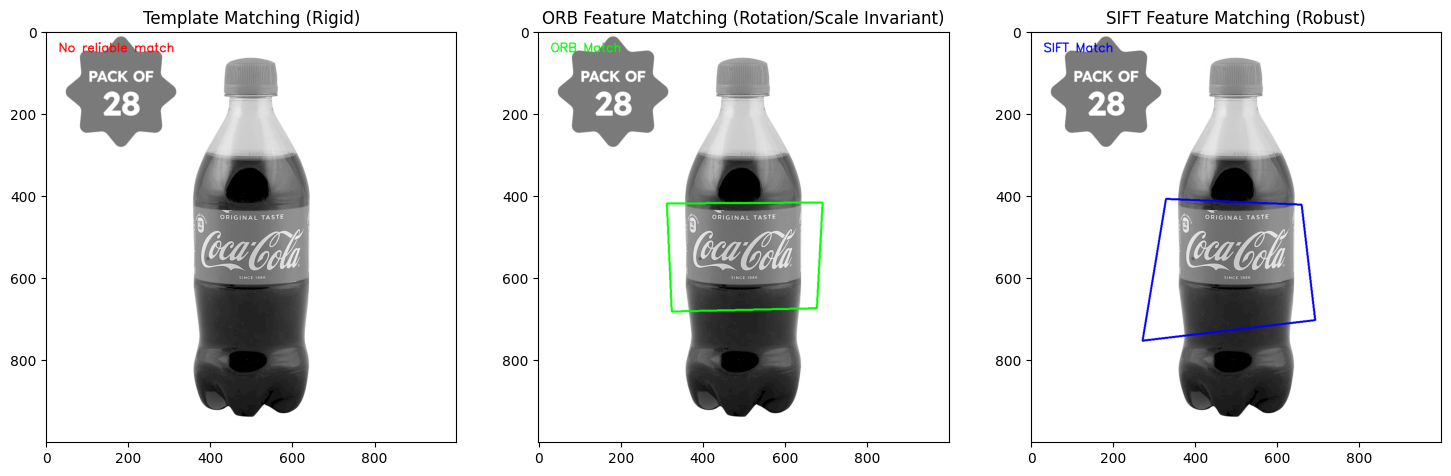

In [6]:
#8. Implement SIFT or ORB feature matching to detect brand logos/serial numbers in product images. Compare with template matching
import cv2
import numpy as np
import matplotlib.pyplot as plt

scene = cv2.imread("D:/HCL-IP/Assignment-1/SIFT or ORB feature matching/product.png", cv2.IMREAD_GRAYSCALE)
template = cv2.imread("D:/HCL-IP/Assignment-1/SIFT or ORB feature matching/logo.png", cv2.IMREAD_GRAYSCALE)
h, w = template.shape[:2]

res = cv2.matchTemplate(scene, template, cv2.TM_CCOEFF_NORMED)
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

output_tm = cv2.cvtColor(scene, cv2.COLOR_GRAY2BGR)
if max_val > 0.6: 
    top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)
    cv2.rectangle(output_tm, top_left, bottom_right, (0,0,255), 3)
    cv2.putText(output_tm, f"Score: {max_val:.2f}", (top_left[0], top_left[1]-10),
                cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0,0,255), 2)
else:
    cv2.putText(output_tm, "No reliable match", (30,50),
                cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,255), 2)

orb = cv2.ORB_create(2000)
kp1_orb, des1_orb = orb.detectAndCompute(template, None)
kp2_orb, des2_orb = orb.detectAndCompute(scene, None)

bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches_orb = bf.match(des1_orb, des2_orb)
matches_orb = sorted(matches_orb, key=lambda x: x.distance)

output_orb = cv2.cvtColor(scene, cv2.COLOR_GRAY2BGR)
if len(matches_orb) > 10:
    src_pts = np.float32([kp1_orb[m.queryIdx].pt for m in matches_orb]).reshape(-1,1,2)
    dst_pts = np.float32([kp2_orb[m.trainIdx].pt for m in matches_orb]).reshape(-1,1,2)
    M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)

    if M is not None:
        pts = np.float32([[0,0],[w,0],[w,h],[0,h]]).reshape(-1,1,2)
        dst = cv2.perspectiveTransform(pts, M)
        cv2.polylines(output_orb, [np.int32(dst)], True, (0,255,0), 3)
        cv2.putText(output_orb, "ORB Match", (30,50), 
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255,0), 2)

sift = cv2.SIFT_create()
kp1_sift, des1_sift = sift.detectAndCompute(template, None)
kp2_sift, des2_sift = sift.detectAndCompute(scene, None)

bf_sift = cv2.BFMatcher()
matches_sift = bf_sift.knnMatch(des1_sift, des2_sift, k=2)

good_sift = []
for m, n in matches_sift:
    if m.distance < 0.75 * n.distance:
        good_sift.append(m)

output_sift = cv2.cvtColor(scene, cv2.COLOR_GRAY2BGR)
if len(good_sift) > 10:
    src_pts = np.float32([kp1_sift[m.queryIdx].pt for m in good_sift]).reshape(-1,1,2)
    dst_pts = np.float32([kp2_sift[m.trainIdx].pt for m in good_sift]).reshape(-1,1,2)
    M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)

    if M is not None:
        pts = np.float32([[0,0],[w,0],[w,h],[0,h]]).reshape(-1,1,2)
        dst = cv2.perspectiveTransform(pts, M)
        cv2.polylines(output_sift, [np.int32(dst)], True, (255,0,0), 3)
        cv2.putText(output_sift, "SIFT Match", (30,50), 
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (255,0,0), 2)

plt.figure(figsize=(18,6))

plt.subplot(1,3,1)
plt.imshow(output_tm[:,:,::-1])
plt.title("Template Matching (Rigid)")

plt.subplot(1,3,2)
plt.imshow(output_orb[:,:,::-1])
plt.title("ORB Feature Matching (Rotation/Scale Invariant)")

plt.subplot(1,3,3)
plt.imshow(output_sift[:,:,::-1])
plt.title("SIFT Feature Matching (Robust)")

plt.show()

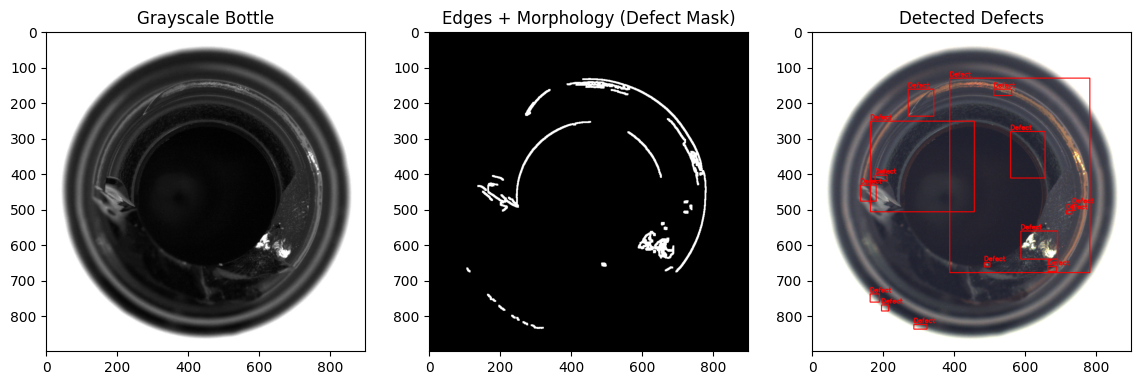

In [7]:
#9.Design a pipeline using edge detection + morphology to detect cracks or missing parts in glass bottle images. Show defect localization.
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread("D:/HCL-IP/Assignment-1/pipeline using edge detection + morphology/broken_bottle.png")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

blur = cv2.GaussianBlur(gray, (5,5), 0)

edges = cv2.Canny(blur, 50, 150)

kernel = np.ones((3,3), np.uint8)

closed = cv2.morphologyEx(edges, cv2.MORPH_CLOSE, kernel, iterations=2)

dilated = cv2.dilate(closed, kernel, iterations=2)

contours, _ = cv2.findContours(dilated, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
output = img.copy()

for c in contours:
    area = cv2.contourArea(c)
    if area > 100:  
        x,y,w,h = cv2.boundingRect(c)
        cv2.rectangle(output, (x,y), (x+w,y+h), (0,0,255), 2)
        cv2.putText(output, "Defect", (x,y-5),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0,0,255), 2)

plt.figure(figsize=(14,7))
plt.subplot(1,3,1)
plt.imshow(gray, cmap='gray')
plt.title("Grayscale Bottle")

plt.subplot(1,3,2)
plt.imshow(dilated, cmap='gray')
plt.title("Edges + Morphology (Defect Mask)")

plt.subplot(1,3,3)
plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))
plt.title("Detected Defects")
plt.show()

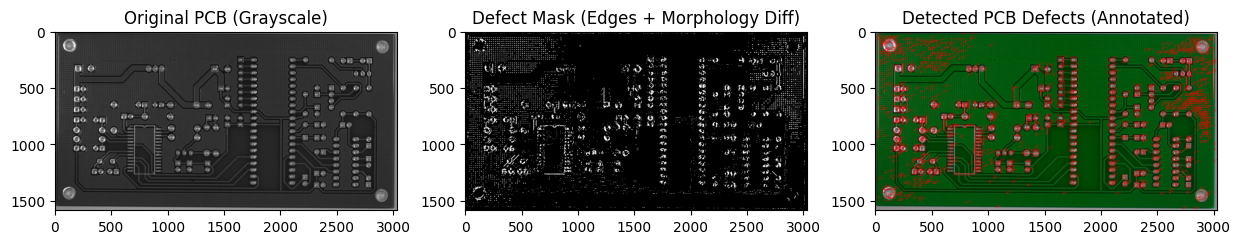

In [8]:
#10.Perform defect detection on PCB images using edge detection and morphology to identify broken tracks or missing solder points. Provide annotated outputs.
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread("D:/HCL-IP/Assignment-1/defect detection on PCB/pcb.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

blur = cv2.GaussianBlur(gray, (5,5), 0)

edges = cv2.Canny(blur, 50, 150)

kernel = np.ones((3,3), np.uint8)

closed = cv2.morphologyEx(edges, cv2.MORPH_CLOSE, kernel, iterations=2)

defect_mask = cv2.subtract(closed, edges)

defect_mask = cv2.dilate(defect_mask, kernel, iterations=1)

contours, _ = cv2.findContours(defect_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

output = img.copy()
for c in contours:
    area = cv2.contourArea(c)
    if area > 30:  
        x, y, w, h = cv2.boundingRect(c)
        cv2.rectangle(output, (x,y), (x+w,y+h), (0,0,255), 2)
        cv2.putText(output, "Defect", (x, y-5),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,255), 1)

plt.figure(figsize=(15,7))
plt.subplot(1,3,1)
plt.imshow(gray, cmap='gray')
plt.title("Original PCB (Grayscale)")

plt.subplot(1,3,2)
plt.imshow(defect_mask, cmap='gray')
plt.title("Defect Mask (Edges + Morphology Diff)")

plt.subplot(1,3,3)
plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))
plt.title("Detected PCB Defects (Annotated)")
plt.show()